In [1]:
import meshio

Efield_2D = meshio.read('Efield_2D_new.vtk')


Unknown section '-10138000384.0000'.


Error: Couldn't read file Efield_2D_new.vtk as vtk

SystemExit: 1

/home/vandelij/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
Efield_2D.keys()

In [5]:
# two triangles and one quad
points = [
    [0.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
    [2.0, 0.0],
    [2.0, 1.0],
]
cells = [
    ("triangle", [[0, 1, 2], [1, 3, 2]]),
    ("quad", [[1, 4, 5, 3]]),
]

mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"T": [0.3, -1.2, 0.5, 0.7, 0.0, -3.0]},
    # Each item in cell data must match the cells array
    cell_data={"a": [[0.1, 0.2], [0.4]]},
)
mesh.write(
    "foo.vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

# Alternative with the same options

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

In [9]:
foo = meshio.vtk.read('foo.vtk')

print(foo.cell_data_dict)

{'a': {'triangle': array([0.1, 0.2]), 'quad': array([0.4])}}


In [28]:
Efield_2D_old = meshio.vtk.read('Efield_2D_old.vtk')

In [53]:
print(Efield_2D_old)

<meshio mesh object>
  Number of points: 256
  Number of cells:
    quad: 225
  Point data: Real_E_alpha, Acold, Bcold, Ccold, Real_eb, Imag_eb, redotj, redotje, redotj1, redotj2, redotj3, wdote, wdoti2, wdoti1, wdoti3, wdoti4, wdot_tot, rho, fz0, mod_eb, mod_e, mod_eplus, mod_eminus, re_eplus, im_eplus, re_eminus, im_eminus, omgexb, uzeta, fpsi0, ftheta0, ntilda_e_real, divq, reomg1, reomg2, reomglh, Re_kperp2_fast, Im_kperp2_fast, Re_kperp2_slow, Im_kperp2_slow, xkprl_a, Re_P_a, xn, xkte


In [52]:
print(Efield_2D_old.point_data.keys())
print(Efield_2D_old.point_data['Imag_eb'].shape)

dict_keys(['Real_E_alpha', 'Acold', 'Bcold', 'Ccold', 'Real_eb', 'Imag_eb', 'redotj', 'redotje', 'redotj1', 'redotj2', 'redotj3', 'wdote', 'wdoti2', 'wdoti1', 'wdoti3', 'wdoti4', 'wdot_tot', 'rho', 'fz0', 'mod_eb', 'mod_e', 'mod_eplus', 'mod_eminus', 're_eplus', 'im_eplus', 're_eminus', 'im_eminus', 'omgexb', 'uzeta', 'fpsi0', 'ftheta0', 'ntilda_e_real', 'divq', 'reomg1', 'reomg2', 'reomglh', 'Re_kperp2_fast', 'Im_kperp2_fast', 'Re_kperp2_slow', 'Im_kperp2_slow', 'xkprl_a', 'Re_P_a', 'xn', 'xkte'])
(256, 1)


In [43]:
Imag_eb = Efield_2D_old.point_data['Imag_eb'].reshape(16, 16)

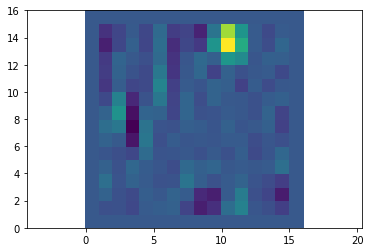

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('equal')
plt.pcolor(Imag_eb.T)

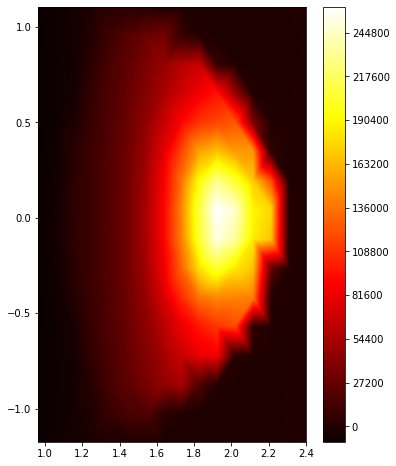

In [55]:
fig1, ax1 = plt.subplots()
fig1.set_figheight(8)
tcf=ax1.tricontourf(Efield_2D_old.points[:,0],Efield_2D_old.points[:,1],Efield_2D_old.point_data['Re_kperp2_fast'][:,0],400, cmap='hot');
#plt.plot(eq[0]['rbbbs'], eq[0]['zbbbs'])
fig1.colorbar(tcf);

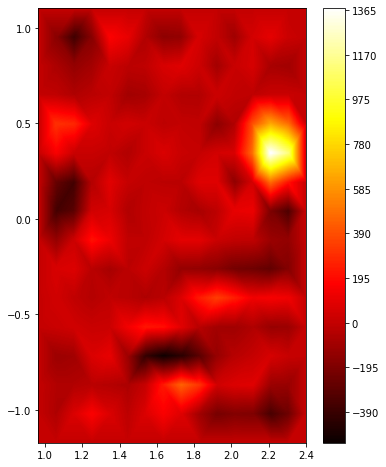

In [56]:
fig1, ax1 = plt.subplots()
fig1.set_figheight(8)
tcf=ax1.tricontourf(Efield_2D_old.points[:,0],Efield_2D_old.points[:,1],Efield_2D_old.point_data['Imag_eb'][:,0],400, cmap='hot');
#plt.plot(eq[0]['rbbbs'], eq[0]['zbbbs'])
fig1.colorbar(tcf);